## Упражнения по библиотеке Numpy

In [48]:
import numpy as np

**1.** Дан случайный массив, поменять знак у элементов, значения которых между 3 и 8

In [49]:
arr = np.random.randint(-9, 10, size=10)
print('Initial array:           ', arr)

arr[3:8] *= -1
print('Array after modification:', arr)

Initial array:            [-3 -9 -6 -2 -8  4 -2  8 -2 -2]
Array after modification: [-3 -9 -6  2  8 -4  2 -8 -2 -2]


**2.** Заменить максимальный элемент случайного массива на 0

In [50]:
arr = np.random.randint(-9, 10, size=10)
print('Initial array:           ', arr)

arr[arr.argmax()] = 0
print('Array after modification:', arr)

Initial array:            [ 9  6 -1 -1  9 -1  8 -2  6 -6]
Array after modification: [ 0  6 -1 -1  9 -1  8 -2  6 -6]


**3.** Построить прямое произведение массивов (все комбинации с каждым элементом). На вход подается двумерный массив

In [51]:
def cartesian_product(arrays):
    arrays = [np.asarray(array) for array in arrays]
    shape = map(len, arrays)

    ix = np.indices(shape, dtype=int)
    ix = ix.reshape(len(arrays), -1).T

    for n, _ in enumerate(arrays):
        ix[:, n] = arrays[n][ix[:, n]]

    return ix


arr = np.random.randint(-9, 10, (3, 2))

print(f'Initial array:\n{arr}\n')
print(f'Array after cartesian product:\n{cartesian_product(arr)}')

Initial array:
[[ 9  0]
 [-5  0]
 [ 6  5]]

Array after cartesian product:
[[ 9 -5  6]
 [ 9 -5  5]
 [ 9  0  6]
 [ 9  0  5]
 [ 0 -5  6]
 [ 0 -5  5]
 [ 0  0  6]
 [ 0  0  5]]


**4.** Даны 2 массива A (8x3) и B (2x2). Найти строки в A, которые содержат элементы из каждой строки в B, независимо от порядка элементов в B

In [52]:
a = np.random.randint(-1, 2, size=(8, 3))
b = np.random.randint(-1, 2, size=(2, 2))

print(f'Array A:\n{a}\n')
print(f'Array B:\n{b}\n')

ind = [np.setdiff1d(b[0], i).size == 0 and np.setdiff1d(b[1], i).size == 0 for i in a]
print('Rows in A that contain elements from each row in B:\n', a[ind])

Array A:
[[-1  1 -1]
 [-1  0 -1]
 [ 1 -1 -1]
 [-1  1 -1]
 [ 1  0  0]
 [-1 -1  1]
 [ 0  0 -1]
 [-1  1  0]]

Array B:
[[-1 -1]
 [ 1  0]]

Rows in A that contain elements from each row in B:
 [[-1  1  0]]


**5.** Дана 10x3 матрица, найти строки из неравных значений (например строка [2,2,3] остается, строка [3,3,3] удаляется)

In [53]:
arr = np.random.randint(-1, 2, (10, 3))
uniq_ind = [np.unique(i).size != 1 for i in arr]

print(f'Initial array:\n{arr}\n')
print(f'Rows of unequal values\n{arr[uniq_ind]}')

Initial array:
[[-1  1 -1]
 [ 0  0 -1]
 [ 0  1 -1]
 [-1  0  0]
 [-1  1  0]
 [ 1  0  0]
 [ 1 -1  1]
 [-1  0  1]
 [-1 -1 -1]
 [ 0 -1 -1]]

Rows of unequal values
[[-1  1 -1]
 [ 0  0 -1]
 [ 0  1 -1]
 [-1  0  0]
 [-1  1  0]
 [ 1  0  0]
 [ 1 -1  1]
 [-1  0  1]
 [ 0 -1 -1]]


**6.** Дан двумерный массив. Удалить те строки, которые повторяются

In [54]:
arr = np.random.randint(-1, 2, (10, 3))
print(f'Initial array:\n{arr}\n')

arr, ind = np.unique(arr, axis=0, return_index=True)
arr = arr[ind.argsort()]

print(f'Array after processing:\n{arr}')

Initial array:
[[ 0  1 -1]
 [ 0  1  0]
 [ 0  0  1]
 [-1 -1 -1]
 [ 0  0  1]
 [-1 -1 -1]
 [-1 -1  0]
 [-1 -1 -1]
 [ 0  0  1]
 [ 0  0  1]]

Array after processing:
[[ 0  1 -1]
 [ 0  1  0]
 [ 0  0  1]
 [-1 -1 -1]
 [-1 -1  0]]


______
______

Для каждой из следующих задач (1-5) нужно привести 2 реализации – одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная с использованием numpy (без использования питоновских циклов/map/list comprehension).


__Замечание 1.__ Можно считать, что все указанные объекты непустые (к примеру, в __задаче 1__ на диагонали матрицы есть ненулевые элементы).

__Замечание 2.__ Для большинства задач решение занимает не больше 1-2 строк.

___

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ 3.

In [73]:
from functools import reduce


x = [[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]
diagonal_product_python = reduce(lambda a, b: a * b, [x[i][i] if x[i][i] != 0 else 1 for i in range(min(len(x), len(x[0])))])

x = np.array(x)
diagonal_product_numpy = np.prod(x.diagonal(), where=x.diagonal()!=0)

print('Product of non-zero elements on the diagonal (Python):', diagonal_product_python)
print('Product of non-zero elements on the diagonal (NumPy):', diagonal_product_numpy)

Product of non-zero elements on the diagonal (Python): 3
Product of non-zero elements on the diagonal (NumPy): 3


* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ True.

In [56]:
from collections import Counter


x, y = [1, 2, 2, 4], [4, 2, 1, 2]
result_python = Counter(x) == Counter(y)

x, y = np.array(x), np.array(y)
result_numpy = np.array_equal(np.sort(x), np.sort(y))

print(f'Do the vectors {x} and {y} define the same multiset (Python): {result_python}')
print(f'Do the vectors {x} and {y} define the same multiset (NumPy): {result_numpy}')

Do the vectors [1 2 2 4] and [4 2 1 2] define the same multiset (Python): True
Do the vectors [1 2 2 4] and [4 2 1 2] define the same multiset (NumPy): True


* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит ноль. 
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ 5.

In [57]:
x = [6, 2, 0, 3, 0, 0, 5, 7, 0]
max_python = max([x[i] for i in range(1, len(x)) if x[i - 1] == 0])

x = np.array(x)
max_numpy = np.max(x[np.where(x[:-1] == 0)[0] + 1])

print(f'The maximum element in vector {x} among elements preceded by zero (Python): {max_python}')
print(f'The maximum element in vector {x} among elements preceded by zero (NumPy): {max_numpy}')

The maximum element in vector [6 2 0 3 0 0 5 7 0] among elements preceded by zero (Python): 5
The maximum element in vector [6 2 0 3 0 0 5 7 0] among elements preceded by zero (NumPy): 5


* __Задача 4__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [58]:
x = [2, 2, 2, 3, 3, 3, 5]
run_length_encoding_python = list(set(x)), [x.count(i) for i in set(x)]

x = np.array(x)
run_length_encoding_numpy = np.unique(x, return_counts=True)

print(f'Run-length encoding for vector {x} (Python): {run_length_encoding_python}')
print(f'Run-length encoding for vector {x} (NumPy): {run_length_encoding_numpy}')

Run-length encoding for vector [2 2 2 3 3 3 5] (Python): ([2, 3, 5], [3, 3, 1])
Run-length encoding for vector [2 2 2 3 3 3 5] (NumPy): (array([2, 3, 5]), array([3, 3, 1], dtype=int64))


* __Задача 5__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравните с функцией scipy.spatial.distance.cdist по скорости работы.

In [59]:
from scipy.spatial import distance


def euclidean_numpy(x, y):
    return np.sqrt(np.abs(np.add.outer(np.sum(x ** 2, axis=1), np.sum(y ** 2, axis=1)) - 2 * np.dot(x, y.T)))


def euclidean_python(x, y):
    return distance.cdist(x, y, 'euclidean')


x = np.random.randint(-9, 10, (5, 2))
y = np.random.randint(-9, 10, (5, 2))
euclidean_distances_numpy = euclidean_numpy(x, y)

x = x.tolist()
y = y.tolist()
euclidean_distances_python = euclidean_python(x, y)

print(f'Matrix of euclidean distances between objects (Python):\n{euclidean_distances_python}\n')
print(f'Matrix of euclidean distances between objects (NumPy):\n{euclidean_distances_numpy}')

Matrix of euclidean distances between objects (Python):
[[10.81665383  2.23606798  7.07106781  5.38516481  9.43398113]
 [15.65247584 15.65247584  8.         11.          5.        ]
 [15.29705854  8.94427191  2.23606798  1.41421356  5.09901951]
 [ 7.28010989 16.64331698 17.88854382 19.41648784 16.76305461]
 [17.         17.          9.05538514 12.04159458  6.08276253]]

Matrix of euclidean distances between objects (NumPy):
[[10.81665383  2.23606798  7.07106781  5.38516481  9.43398113]
 [15.65247584 15.65247584  8.         11.          5.        ]
 [15.29705854  8.94427191  2.23606798  1.41421356  5.09901951]
 [ 7.28010989 16.64331698 17.88854382 19.41648784 16.76305461]
 [17.         17.          9.05538514 12.04159458  6.08276253]]


In [60]:
import time


def time_of_func(func):
    def wrapped(*args, **kwargs):
        start = time.perf_counter_ns()
        func(*args, **kwargs)
        return time.perf_counter_ns() - start
    return wrapped

<function matplotlib.pyplot.show(close=None, block=None)>

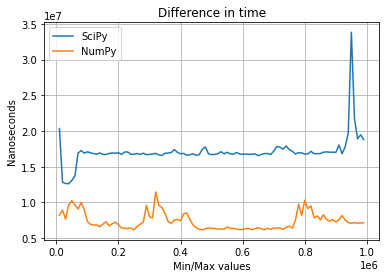

In [71]:
from statistics import mean
import matplotlib.pyplot as plt


def get_time(func, *args, rep_num=100):
    return mean([func(*args) for _ in range(rep_num)])


values = [value for value in range(10000, 1000000, 10000)]
x_list = [np.random.randint(-value, value, (100, 100), dtype=np.intp) for value in values]
y_list = [np.random.randint(-value, value, (1000, 100), dtype=np.intp) for value in values]

scipy_time = [get_time(time_of_func(euclidean_python), x.tolist(), y.tolist()) for x, y in zip(x_list, y_list)]
numpy_time = [get_time(time_of_func(euclidean_numpy), x, y)  for x, y in zip(x_list, y_list)]

plt.title('Difference in time')
plt.xlabel('Min/Max values')
plt.ylabel('Nanoseconds')
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.plot(values, scipy_time, label='SciPy')
plt.plot(values, numpy_time, label='NumPy')
plt.legend()
plt.show

* #### __Задача 6__: CrunchieMunchies __*__

Вы работаете в отделе маркетинга пищевой компании MyCrunch, которая разрабатывает новый вид вкусных, полезных злаков под названием **CrunchieMunchies**.

Вы хотите продемонстрировать потребителям, насколько полезны ваши хлопья по сравнению с другими ведущими брендами, поэтому вы собрали данные о питании нескольких разных конкурентов.

Ваша задача - использовать вычисления Numpy для анализа этих данных и доказать, что ваши **СrunchieMunchies** - самый здоровый выбор для потребителей.


In [62]:
import numpy as np

1. Просмотрите файл cereal.csv. Этот файл содержит количества калорий для различных марок хлопьев. Загрузите данные из файла и сохраните их как calorie_stats.

In [63]:
calorie_stats = np.loadtxt("./data/cereal.csv", delimiter=",")
calorie_stats

array([ 70., 120.,  70.,  50., 110., 110., 110., 130.,  90.,  90., 120.,
       110., 120., 110., 110., 110., 100., 110., 110., 110., 100., 110.,
       100., 100., 110., 110., 100., 120., 120., 110., 100., 110., 100.,
       110., 120., 120., 110., 110., 110., 140., 110., 100., 110., 100.,
       150., 150., 160., 100., 120., 140.,  90., 130., 120., 100.,  50.,
        50., 100., 100., 120., 100.,  90., 110., 110.,  80.,  90.,  90.,
       110., 110.,  90., 110., 140., 100., 110., 110., 100., 100., 110.])

2. В одной порции CrunchieMunchies содержится 60 калорий. Насколько выше среднее количество калорий у ваших конкурентов?

Сохраните ответ в переменной average_calories и распечатайте переменную в терминале

In [64]:
crunchie_calories = 60
avgerage_calories = np.mean(calorie_stats) - crunchie_calories

print(f'The average number of calories your competitors have is {avgerage_calories} higher')

The average number of calories your competitors have is 46.883116883116884 higher


3. Корректно ли среднее количество калорий отражает распределение набора данных? Давайте отсортируем данные и посмотрим.

Отсортируйте данные и сохраните результат в переменной calorie_stats_sorted. Распечатайте отсортированную информацию

In [65]:
calorie_stats_sorted = np.sort(calorie_stats)
calorie_stats_sorted

array([ 50.,  50.,  50.,  70.,  70.,  80.,  90.,  90.,  90.,  90.,  90.,
        90.,  90., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 110., 110., 110.,
       110., 110., 110., 110., 110., 110., 110., 110., 110., 110., 110.,
       110., 110., 110., 110., 110., 110., 110., 110., 110., 110., 110.,
       110., 110., 110., 110., 120., 120., 120., 120., 120., 120., 120.,
       120., 120., 120., 130., 130., 140., 140., 140., 150., 150., 160.])

4. Похоже, что большинство значений выше среднего. Давайте посмотрим, является ли медиана наиболее корректным показателем набора данных.

Вычислите медиану набора данных и сохраните свой ответ в median_calories. Выведите медиану, чтобы вы могли видеть, как она сравнивается со средним значением.

In [66]:
median_calories = np.median(calorie_stats_sorted)
print('Median of the data set:', median_calories)

Median of the data set: 110.0


5. В то время как медиана показывает, что по крайней мере половина наших значений составляет более 100 калорий, было бы более впечатляюще показать, что значительная часть конкурентов имеет более высокое количество калорий, чем CrunchieMunchies.

Рассчитайте различные процентили и распечатайте их, пока не найдете наименьший процентиль, превышающий 60 калорий. Сохраните это значение в переменной nth_percentile.

In [72]:
nth_percentile, percentiles_list= .0, []
while np.percentile(calorie_stats, nth_percentile) <= 60:
    nth_percentile += 0.01
    percentiles_list.append((round(nth_percentile, 3), np.percentile(calorie_stats, nth_percentile)))

print('The lowest percentile exceeding 60 calories:', nth_percentile)
percentiles_list

The lowest percentile exceeding 60 calories: 3.289999999999974


[(0.01, 50.0),
 (0.02, 50.0),
 (0.03, 50.0),
 (0.04, 50.0),
 (0.05, 50.0),
 (0.06, 50.0),
 (0.07, 50.0),
 (0.08, 50.0),
 (0.09, 50.0),
 (0.1, 50.0),
 (0.11, 50.0),
 (0.12, 50.0),
 (0.13, 50.0),
 (0.14, 50.0),
 (0.15, 50.0),
 (0.16, 50.0),
 (0.17, 50.0),
 (0.18, 50.0),
 (0.19, 50.0),
 (0.2, 50.0),
 (0.21, 50.0),
 (0.22, 50.0),
 (0.23, 50.0),
 (0.24, 50.0),
 (0.25, 50.0),
 (0.26, 50.0),
 (0.27, 50.0),
 (0.28, 50.0),
 (0.29, 50.0),
 (0.3, 50.0),
 (0.31, 50.0),
 (0.32, 50.0),
 (0.33, 50.0),
 (0.34, 50.0),
 (0.35, 50.0),
 (0.36, 50.0),
 (0.37, 50.0),
 (0.38, 50.0),
 (0.39, 50.0),
 (0.4, 50.0),
 (0.41, 50.0),
 (0.42, 50.0),
 (0.43, 50.0),
 (0.44, 50.0),
 (0.45, 50.0),
 (0.46, 50.0),
 (0.47, 50.0),
 (0.48, 50.0),
 (0.49, 50.0),
 (0.5, 50.0),
 (0.51, 50.0),
 (0.52, 50.0),
 (0.53, 50.0),
 (0.54, 50.0),
 (0.55, 50.0),
 (0.56, 50.0),
 (0.57, 50.0),
 (0.58, 50.0),
 (0.59, 50.0),
 (0.6, 50.0),
 (0.61, 50.0),
 (0.62, 50.0),
 (0.63, 50.0),
 (0.64, 50.0),
 (0.65, 50.0),
 (0.66, 50.0),
 (0.67, 50.0),
 

6. Хотя процентиль показывает нам, что у большинства конкурентов количество калорий намного выше, это неудобная концепция для использования в маркетинговых материалах.

Вместо этого давайте подсчитаем процент хлопьев, в которых содержится более 60 калорий на порцию. Сохраните свой ответ в переменной more_calories и распечатайте его

In [68]:
more_calories = len(calorie_stats[calorie_stats_sorted > 60]) / len(calorie_stats_sorted)
print(f'Percentage of flakes that contain more than 60 calories per serving is {more_calories} percent')

Percentage of flakes that contain more than 60 calories per serving is 0.961038961038961 percent


7. Это действительно высокий процент. Это будет очень полезно, когда мы будем продвигать CrunchieMunchies. Но один вопрос заключается в том, насколько велики различия в наборе данных? Можем ли мы сделать обобщение, что в большинстве злаков содержится около 100 калорий или разброс еще больше?

Рассчитайте величину отклонения, найдя стандартное отклонение, Сохраните свой ответ в calorie_std и распечатайте на терминале. Как мы можем включить эту ценность в наш анализ?

In [69]:
calorie_std = np.std(calorie_stats)
print('The standard deviation is', calorie_std)

The standard deviation is 19.35718533390827


Так как стандартное отклонение равно почти 20 всего лишь при размере выборки равной 77, то можно сказать, что стандартное отклонение является высоким. Высокое стандартное отклонение показывает, что данные широко разбросаны (менее надежны). Следовательно, нельзя полностью доверять данной выборке, и следовало бы увеличить её.

8. Напишите короткий абзац, в котором кратко изложите свои выводы и то, как, по вашему мнению, эти данные могут быть использованы в интересах Mycrunch при маркетинге CrunchieMunchies.

В среднем колличество калорий в CrunchieMunchies меньше, чем у конкурентов на 46 кКал, однако эти цифры мало о чём говорят (может в выборке присутствует вид хлопьев с огромным колличеством кКал, т.е. выброс для данной выборки).

Медиана и процентиль так же говорят, что как минимум половина хлопьев конкурентов содаржат в себе на 50 кКал больше, чем CrunchieMunchies и что CrunchieMunchies являются почти что лучшими (в плане калорийности). Однако, как было сказано выше, это неудобная концепция для использования в маркетинговых целях.

Для маркетинга идеально было бы идеально использовать слоганы: "Хлопья CrunchieMunchies менее калорийны 96% других хлопьев" или "В хлопьях CrunchieMunchies на 44% меньше калорий, чем в других хлопьях".